This EDA notebooks aims to have a broad understanding of the problem to be solved.

It partiallly builds on the [EDA Notebook by Oleg X@Kaggle](https://www.kaggle.com/code/allegich/arc-agi-2025-starter-notebook-eda/notebook)

In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
!pip install -qq matplotlib numpy pandas
!pip install -qq torch torchvision torchaudio


# Libs

In [46]:
import matplotlib.pyplot as plt

import numpy as np

import os.path as osp

import pandas as pd
from pprint import pprint

import sys
sys.path.append(".")


In [47]:
from src.config import Config
from src.utils import (load_data, 
                        plot_grid, 
                        plot_random, 
                        visualize_task, 
                        sample_arc_task, 
                        get_row_sizes,
                        reconstruct_grids)

# Load data

In [48]:
train_data, test_data = load_data(data_path=Config.data_path)

print(f"✓ Loaded {len(train_data)} training problems")
print(f"✓ Loaded {len(test_data)} test problems")

✓ Loaded 746 training problems
✓ Loaded 185 test problems


In [49]:
train_ids = list(train_data.keys())

train_ids[:5]

['train_0000', 'train_0001', 'train_0002', 'train_0003', 'train_0004']

In [50]:
example_task_id, example_task = sample_arc_task(train_data, split=None)

print(f"Sampled task: {example_task_id}")
if isinstance(example_task, dict) and len(example_task) > 1:
    print("Train examples:")
    pprint(example_task["train"])
    print("Test example:")
    pprint(example_task["test"])
else:
    pprint(example_task)


Sampled task: train_0006
Train examples:
[{'input': [[9, 9, 2, 2, 2, 2],
            [9, 9, 2, 2, 2, 2],
            [9, 0, 2, 2, 2, 2],
            [9, 9, 2, 2, 2, 2],
            [2, 2, 2, 2, 2, 2],
            [2, 2, 2, 2, 9, 9],
            [2, 2, 2, 2, 9, 9],
            [2, 2, 2, 2, 9, 0],
            [2, 2, 2, 2, 9, 9]],
  'output': [[2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2],
             [6, 2, 2, 2, 2, 2, 9, 9, 0, 9, 6],
             [6, 2, 2, 2, 2, 2, 9, 9, 9, 9, 6],
             [6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6],
             [6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6],
             [6, 9, 9, 0, 9, 2, 2, 2, 2, 2, 6],
             [6, 9, 9, 9, 9, 2, 2, 2, 2, 2, 6],
             [2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2],
             [6, 2, 2, 2, 2, 2, 9, 9, 0, 9, 6],
             [6, 2, 2, 2, 2, 2, 9, 9, 9, 9, 6],
             [6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6],
             [6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6],
             [6, 9, 9, 0, 9, 2, 2, 2, 2, 2, 6],
             [6, 9, 9, 9, 9, 2, 2, 2, 2, 2, 6]

# Stats

In [51]:
problem_stats = []

for sample_id in range(len(train_data)):
    sample_problem = train_ids[sample_id]
    num_train_instances = len(train_data[sample_problem]["train"])
    num_test_instances  = len(train_data[sample_problem]["test"])

    stat = {
        "sample_problem": sample_problem,
        "num_train_instances": num_train_instances,
        "num_test_instances": num_test_instances
    }

    problem_stats.append(stat)


In [52]:
problem_stats[0]

{'sample_problem': 'train_0000',
 'num_train_instances': 3,
 'num_test_instances': 1}

In [53]:
all_num_train_instances = [p["num_train_instances"] for p in problem_stats]
all_num_test_instances = [p["num_test_instances"] for p in problem_stats]

max(all_num_train_instances), min(all_num_train_instances), max(all_num_test_instances), min(all_num_test_instances)

(8, 2, 1, 1)

# Data Viz

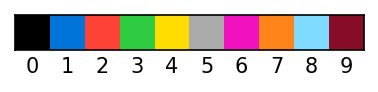

In [54]:
# 0:black, 1:blue, 2:red, 3:green, 4:yellow, # 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown

plt.figure(figsize=(3, 1), dpi=150)
plt.imshow([list(range(10))], cmap=Config.CMAP, norm=Config.NORM)
plt.xticks(list(range(10)))
plt.yticks([])
plt.tick_params(axis='x', color='r', length=0, grid_color='none')
    
plt.show()

## Plot One Sample

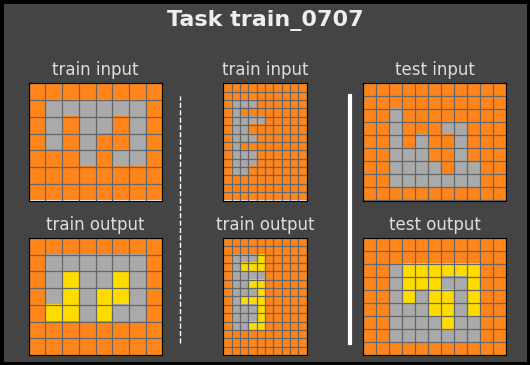

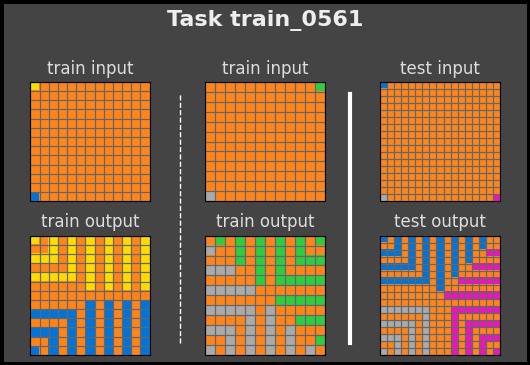

In [55]:
for _ in range(2):
    plot_random(data=train_data)

Insight: Interestingly, it seems much harder to find the transformations or rules with only one example...even by looking at the actual solution to the test input.

## Plot All Task Problems

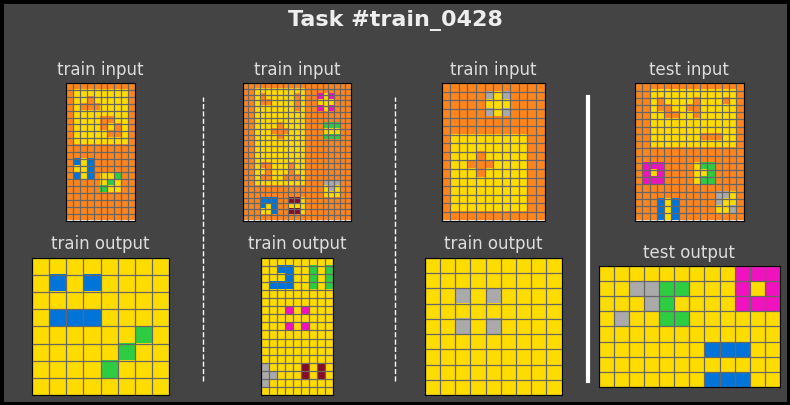

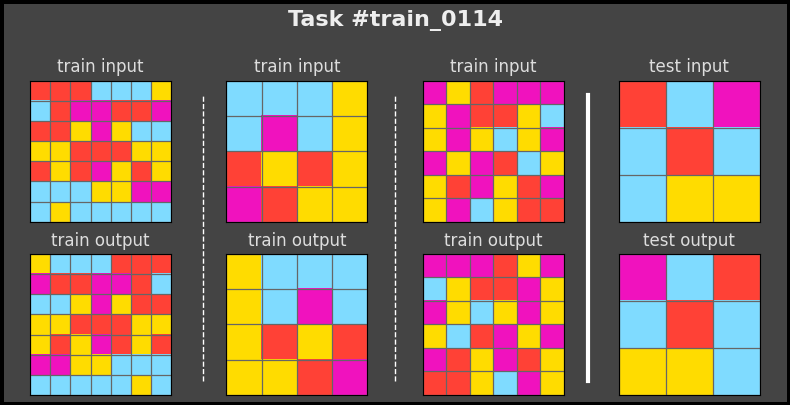

In [56]:
for i in range(2):
    task_id, task_data = sample_arc_task(train_data, split=None)
    visualize_task(task_data=task_data,task_id=task_id, size=2.0, w1=.9)

In [57]:
# Load sample submission to see the format
sample_submission = pd.read_csv(
    osp.join(Config.data_path, 'SampleSubmission.csv'),
    dtype={"row": str}
)

print(f"✓ Sample submission has {len(sample_submission)} predictions")

✓ Sample submission has 2303 predictions


In [58]:
sample_submission

,ID,row
0,test_0000_1,0000000000
1,test_0000_2,0000000000
2,test_0000_3,0000000000
3,test_0000_4,0000000000
4,test_0000_5,0000000000
...,...,...
2298,test_0184_6,0000000000
2299,test_0184_7,0000000000
2300,test_0184_8,0000000000
2301,test_0184_9,0000000000


In [59]:
preds = reconstruct_grids(sample_submission)
preds.keys() == test_data.keys()

True

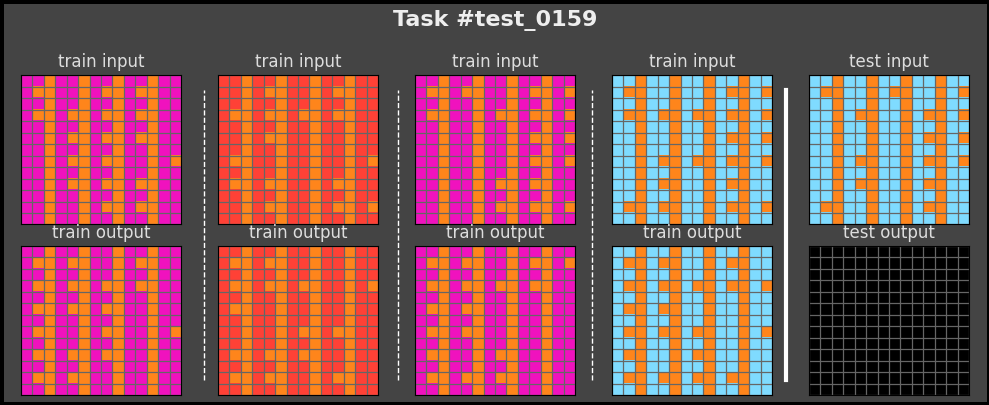

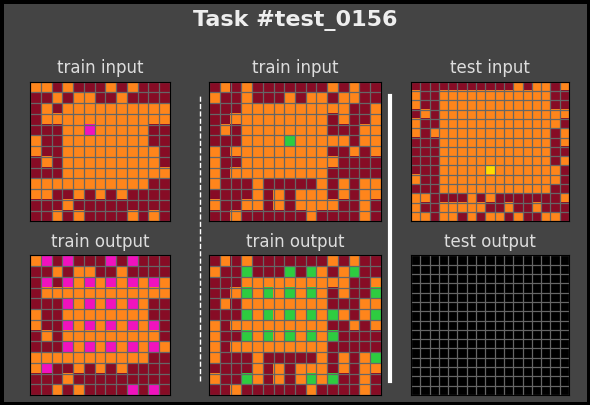

In [60]:
for i in range(2):
    task_id, task_data = sample_arc_task(test_data, split=None)    
    visualize_task(task_data=task_data,task_id=task_id, size=2.0, w1=.9, task_solutions=preds)

In [61]:
background_preds = []

for idx, row in sample_submission.iterrows():
    updated_pred = "7"*len(row.row)
    background_preds.append(updated_pred)

sample_submission["row"] = background_preds
sample_submission

,ID,row
0,test_0000_1,7777777777
1,test_0000_2,7777777777
2,test_0000_3,7777777777
3,test_0000_4,7777777777
4,test_0000_5,7777777777
...,...,...
2298,test_0184_6,7777777777
2299,test_0184_7,7777777777
2300,test_0184_8,7777777777
2301,test_0184_9,7777777777


In [62]:
len(sample_submission.row.tolist()) == len(background_preds)

True

In [63]:
preds = reconstruct_grids(sample_submission)
preds.keys() == test_data.keys()

True

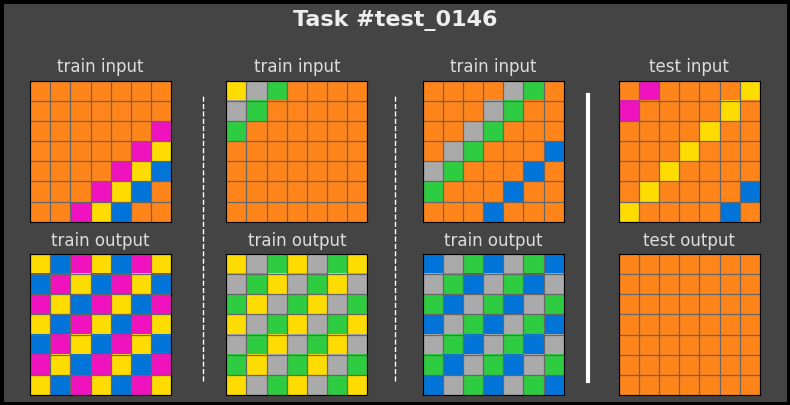

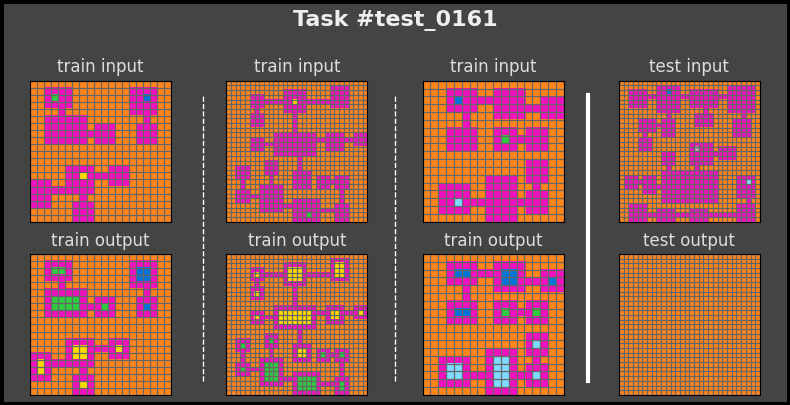

In [64]:
for i in range(2):
    task_id, task_data = sample_arc_task(test_data, split=None)    
    visualize_task(task_data=task_data,task_id=task_id, size=2.0, w1=.9, task_solutions=preds)

Inight: the sample submission file has the right grid size. So one can actually use this to constrain the model prediction to at list get the size right, even though this does not yield to any reward in the normal ARC-AGI setting.

An all-black solution results in a score ranging from approx. `0.31% to 4.65%` while an all-orange solution yields to a baseline score of approx `11.72%`. This is a pretty simple way to identify meaningful baseline in order to monitor progress while adding more and more complexity to the pipeline. 